# 머신러닝 회귀분석

신체데이터에서 무게를 독립변수, 키를 종속변수로 두어 사람의 무게를 받으면 키를 예측하는 프로그램

In [18]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import pandas as pd
%matplotlib inline

필요한 모듈 임포트

In [19]:
baseDatabase = pd.read_csv("MilitaryLinearRegressionData2.csv", index_col=0)

데이터 셋 입력

In [20]:
whereIsNull = pd.isnull(baseDatabase)
print (whereIsNull)
baseDatabase[whereIsNull] = 0

    bust_circ_cm sleeve_len_cm statur_cm wst_circ_cm crotch_hght_cm  \
seq                                                                   
1          False         False     False       False          False   
1          False         False     False       False          False   
2          False         False     False       False          False   
2          False         False     False       False          False   
3          False         False     False       False          False   
3          False         False     False       False          False   
4          False         False     False       False          False   
4          False         False     False       False          False   
5          False         False     False       False          False   
5          False         False     False       False          False   
6          False         False     False       False          False   
6          False         False     False       False          False   
7     

데이터 전처리

In [21]:
print("* baseDatabase.head()", baseDatabase.head(), sep="\n", end="\n\n")

* baseDatabase.head()
     bust_circ_cm  sleeve_len_cm  statur_cm  wst_circ_cm  crotch_hght_cm  \
seq                                                                        
1           101.9           83.8      167.2         81.2            74.4   
1            96.3           92.6      185.5         82.5            83.8   
2            98.6           85.5      171.4         85.9            76.4   
2            99.5           89.6      179.9         99.2            84.2   
3           122.3           90.2      180.5        118.4            79.7   

     hd_circ_cm  foot_len_cm  weight_kg  
seq                                      
1          55.0         24.2       65.1  
1          57.1         28.5       73.2  
2          54.5         27.4       71.6  
2          56.3         28.1       93.2  
3          61.5         29.0      114.2  



데이터 윗부분 테스트 출력

In [22]:
print("* baseDatabase.tail()", baseDatabase.tail(), sep="\n", end="\n\n")

* baseDatabase.tail()
     bust_circ_cm  sleeve_len_cm  statur_cm  wst_circ_cm  crotch_hght_cm  \
seq                                                                        
23          107.6           89.3      179.1         95.0            79.2   
23           88.9           89.5      179.9         80.8            82.6   
24           84.5           86.9      174.5         75.0            77.0   
24           88.5           89.5      178.9        112.6            81.9   
25          123.3           84.6      169.2        114.7            74.6   

     hd_circ_cm  foot_len_cm  weight_kg  
seq                                      
23         57.6         27.7       88.4  
23         55.7         26.5       65.1  
24         56.9         25.3       53.1  
24         56.1         26.1       58.8  
25         61.6         25.5      102.4  



데이터 아랫부분 테스트 출력

In [23]:
baseDatabase.columns[:]

Index([u'bust_circ_cm', u'sleeve_len_cm', u'statur_cm', u'wst_circ_cm',
       u'crotch_hght_cm', u'hd_circ_cm', u'foot_len_cm', u'weight_kg'],
      dtype='object')

입력받은 데이터 컬럼명 조사

In [24]:
xCoordinate = baseDatabase["weight_kg"]

무게 데이터를 종속변수로 둠

In [25]:
yCoordinate = baseDatabase["statur_cm"]

키 데이터를 독립변수로 둠

In [26]:
xCoordinateTrain, xCoordinatetTest = train_test_split(xCoordinate, test_size = 0.3)
print("X train : ", len(xCoordinateTrain), " X test : ", len(xCoordinatetTest))

X train :  34  X test :  15


70 : 30 으로 트레이닝 데이터, 테스트 데이터로 나눔

In [27]:
yCoordinateTrain, yCoordinateTest = train_test_split(yCoordinate, test_size = 0.3)
print("Y train : ", len(yCoordinateTrain), " Y test : ", len(yCoordinateTest))

Y train :  34  Y test :  15


70 : 30 으로 트레이닝 데이터, 테스트 데이터로 나눔

In [28]:
linearModel = linear_model.LinearRegression()

모델링 객체 생성

In [29]:
linearModel.fit(xCoordinateTrain.to_frame(), yCoordinateTrain.to_frame())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

모델링

In [30]:
print('Coefficients: \n', linearModel.coef_)

Coefficients: 
 [[ 0.00037015]]


상관계수 조사

In [31]:
print("Mean squared error: %.2f"
      % np.mean((linearModel.predict(xCoordinatetTest.to_frame()) - yCoordinateTest.to_frame()) ** 2))

Mean squared error: 21.41


오류 폭 조사

In [32]:
print('Variance score: %.2f' % linearModel.score(xCoordinatetTest.to_frame(), yCoordinateTest.to_frame()))

Variance score: -0.00


분산이 왜 이딴식이지

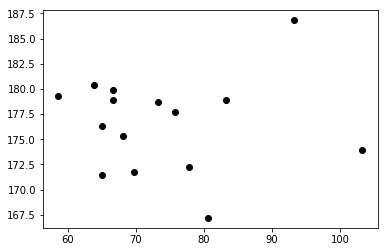

In [33]:
plt.scatter(xCoordinatetTest.to_frame(), yCoordinateTest.to_frame(),  color='black')

plot 출력

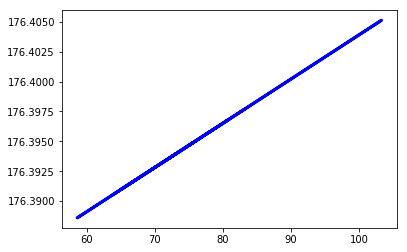

In [34]:
plt.plot(xCoordinatetTest.to_frame(), linearModel.predict(xCoordinatetTest.to_frame()), color='blue',
         linewidth=3)

회귀 직선 출력